# Import libs

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Generate synthetic data


In [9]:
np.random.seed(42)
X = np.random.rand(1000, 1) * 10  # Feature in range [0, 10]
y = 2 * X + np.random.normal(0, 1, (1000, 1))  # Linear relationship with noise

# Train-test split


In [10]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

# Build a simple model


In [11]:
model = Sequential([Dense(1, input_shape=(1,))])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model


In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

# Plot the loss curves


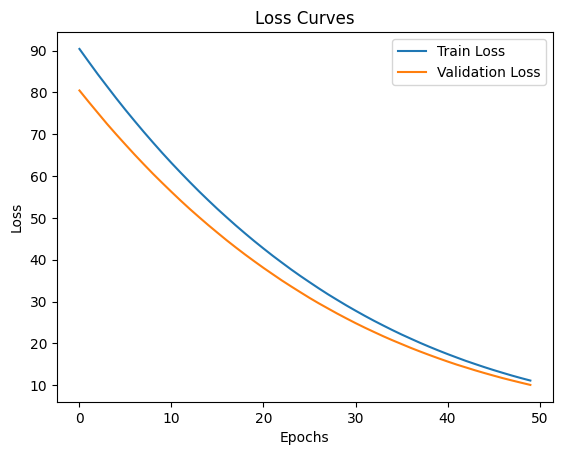

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
     if epoch < 10:
         return lr
     else:
         return np.float64(lr * tf.exp(-0.1))

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.01),  loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[callback], verbose=1)


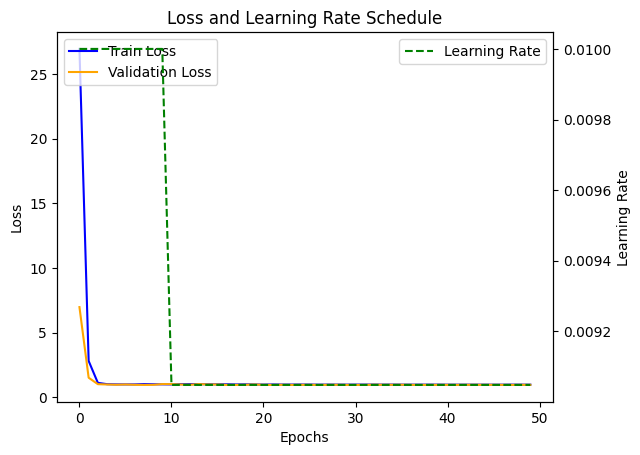

In [24]:

# Plot loss and learning rate
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.plot(history.history['loss'], label='Train Loss', color='blue')
ax1.plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax2.plot(range(50), [scheduler(e, 0.01) for e in range(50)], label='Learning Rate', color='green', linestyle='dashed')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Learning Rate')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Loss and Learning Rate Schedule')
plt.show()